In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split



In [13]:
train_df = pd.read_csv('train_spam.csv')
test_df = pd.read_csv('test_spam.csv')

In [14]:
train_df

text_type                                               text
0           ham  make sure alex knows his birthday is over in f...
1           ham  a resume for john lavorato thanks vince i will...
2          spam  plzz visit my website moviesgodml to get all m...
3          spam  urgent your mobile number has been awarded wit...
4           ham  overview of hr associates analyst project per ...
...         ...                                                ...
16273      spam  if you are interested in binary options tradin...
16274      spam  dirty pictureblyk on aircel thanks you for bei...
16275       ham  or you could do this g on mon 1635465 sep 1635...
16276       ham  insta reels par 80 गंद bhara pada hai 👀 kuch b...
16277       ham  alex s paper comments 1 in the sentence betwee...

[16278 rows x 2 columns]

In [15]:
test_df

text
0     j jim whitehead ejw cse ucsc edu writes j you ...
1     original message from bitbitch magnesium net p...
2     java for managers vince durasoft who just taug...
3                  there is a youtuber name saiman says
4     underpriced issue with high return on equity t...
...                                                 ...
4065  husband to wifetum meri zindagi hoorwifeor kya...
4066  baylor enron case study cindy yes i shall co a...
4067                           boring as compared to tp
4068  hellogorgeous hows u my fone was on charge lst...
4069  energy conference mark we are really swamped a...

[4070 rows x 1 columns]

Нулевые значения отсутсвуют.

In [16]:
train_df.isnull().sum()

text_type    0
text         0
dtype: int64

In [17]:
train_df['labels'] = train_df.text_type.map({'ham':0, 'spam':1})

In [18]:
train_df

text_type                                               text  labels
0           ham  make sure alex knows his birthday is over in f...       0
1           ham  a resume for john lavorato thanks vince i will...       0
2          spam  plzz visit my website moviesgodml to get all m...       1
3          spam  urgent your mobile number has been awarded wit...       1
4           ham  overview of hr associates analyst project per ...       0
...         ...                                                ...     ...
16273      spam  if you are interested in binary options tradin...       1
16274      spam  dirty pictureblyk on aircel thanks you for bei...       1
16275       ham  or you could do this g on mon 1635465 sep 1635...       0
16276       ham  insta reels par 80 गंद bhara pada hai 👀 kuch b...       0
16277       ham  alex s paper comments 1 in the sentence betwee...       0

[16278 rows x 3 columns]

In [19]:
train_df.text_type.value_counts()

text_type
ham     11469
spam     4809
Name: count, dtype: int64

In [24]:
nltk.download('stopwords')
corpus = []
for i in range(0, len(train_df)):
    review = re.sub('[^a-zA-Z]', ' ', train_df['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    print(i, review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0 make sure alex know birthday fifteen minut far your concern


1 resum john lavorato thank vinc get move right away molli vinc j kaminski pm molli mage hou ect ect cc vinc j kaminski hou ect ect subject resum john lavorato molli pleas make arrang interview candid trade posit interview john lavorato jeff shankman gari hickerson stinson gibner talk new york consid opportun act fast think john like punit thank
2 plzz visit websit moviesgodml get movi free also provid direct download link redirect ad
3 urgent mobil number award prize guarante call land line claim valid hr ppm
4 overview hr associ analyst project per david request attach overview hr associ analyst project creat human resourc valu index document provid brief top line overview follow descript challeng peopl involv posit outcom high level descript process suggest question tuesday meet pleas contact either dan brown thank tana cashion david oxley ect gerri gibson corp enron enron cc andrea yowman corp enron enron bob sparger corp enron enron tim rourk corp enron enron ted c bland hou ect e

In [28]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = train_df.iloc[:, 0].values

In [30]:
from wordcloud import WordCloud

In [31]:
ham_words = ''
spam_words = ''
spam = train_df[train_df.labels == 1]
ham = train_df[train_df.labels == 0]

In [32]:
for val in spam.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
        spam_words = spam_words + words + ' '
    
for val in ham.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
          ham_words = ham_words + words + ' '
      

In [33]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

Самые популярные слова в спам-текстах.

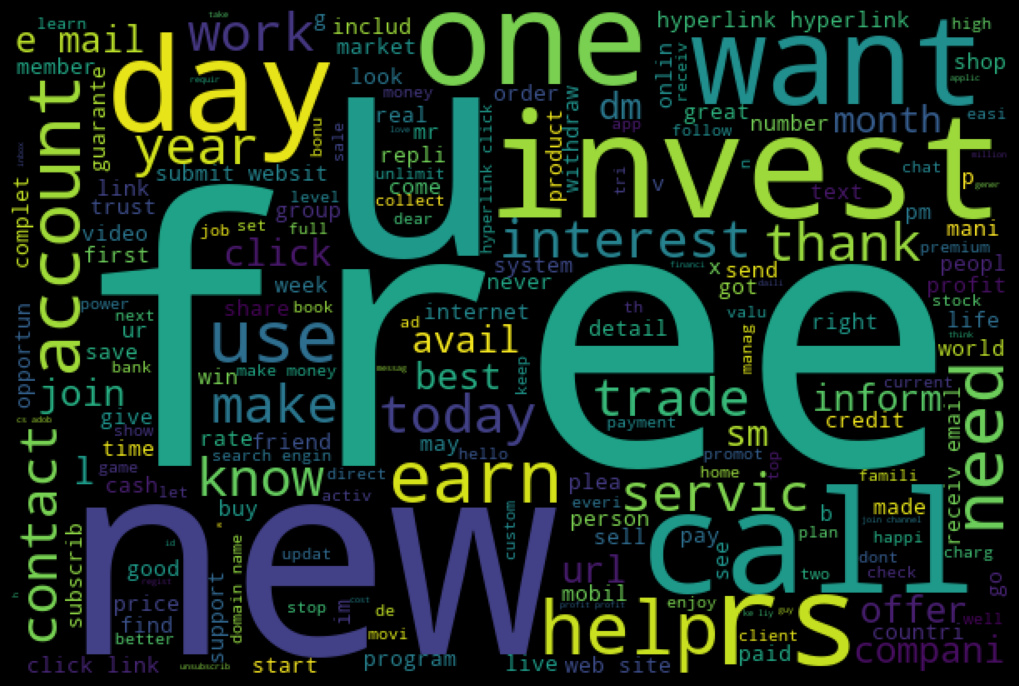

In [34]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Самые популярные слова в не спам текстах.

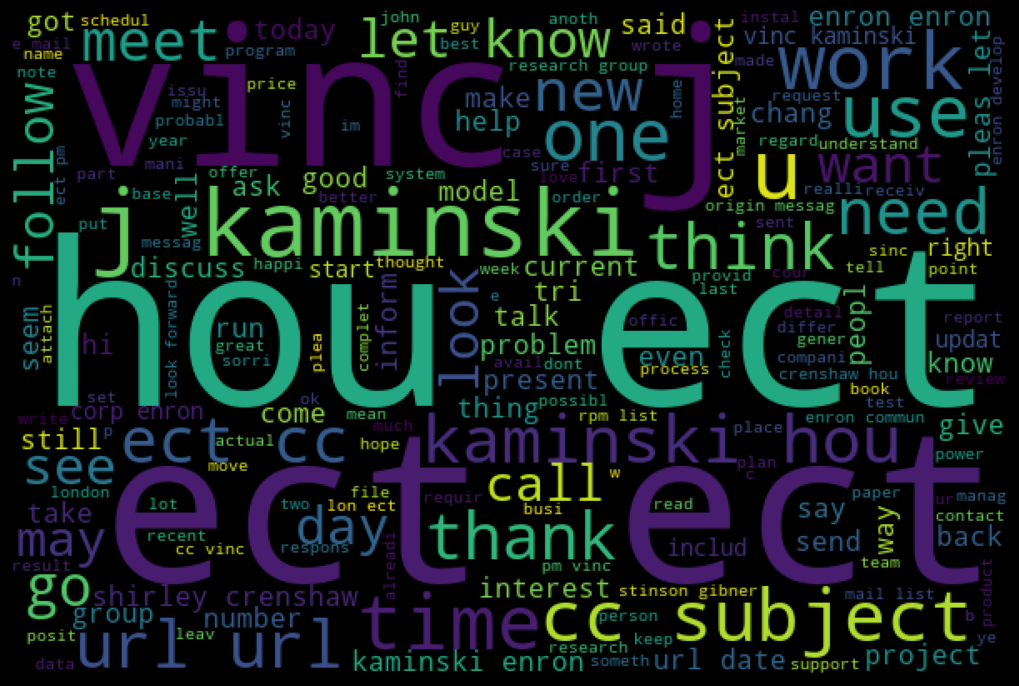

In [35]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [37]:
train_df['text_len'] = train_df['text'].apply(len)
train_df.head()

text_type                                               text  labels  \
0       ham  make sure alex knows his birthday is over in f...       0   
1       ham  a resume for john lavorato thanks vince i will...       0   
2      spam  plzz visit my website moviesgodml to get all m...       1   
3      spam  urgent your mobile number has been awarded wit...       1   
4       ham  overview of hr associates analyst project per ...       0   

   text_len  
0        86  
1       520  
2       126  
3       139  
4       733

In [39]:
train_df.groupby('labels').describe().T

labels                    0            1
text_len count  11469.00000  4809.000000
         mean     314.16828   301.357247
         std      307.13490   235.220984
         min        1.00000     5.000000
         25%       41.00000   136.000000
         50%      141.00000   195.000000
         75%      686.00000   433.000000
         max      800.00000   800.000000

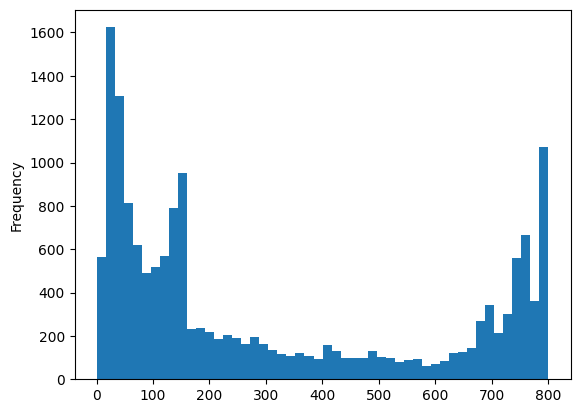

In [40]:
train_df['text_len'].plot(kind='hist',bins=50)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6124\1631714146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='text_len',y='labels',ax=ax,data=train_df,palette='Set3')


Text(0.5, 1.0, 'listing_type')

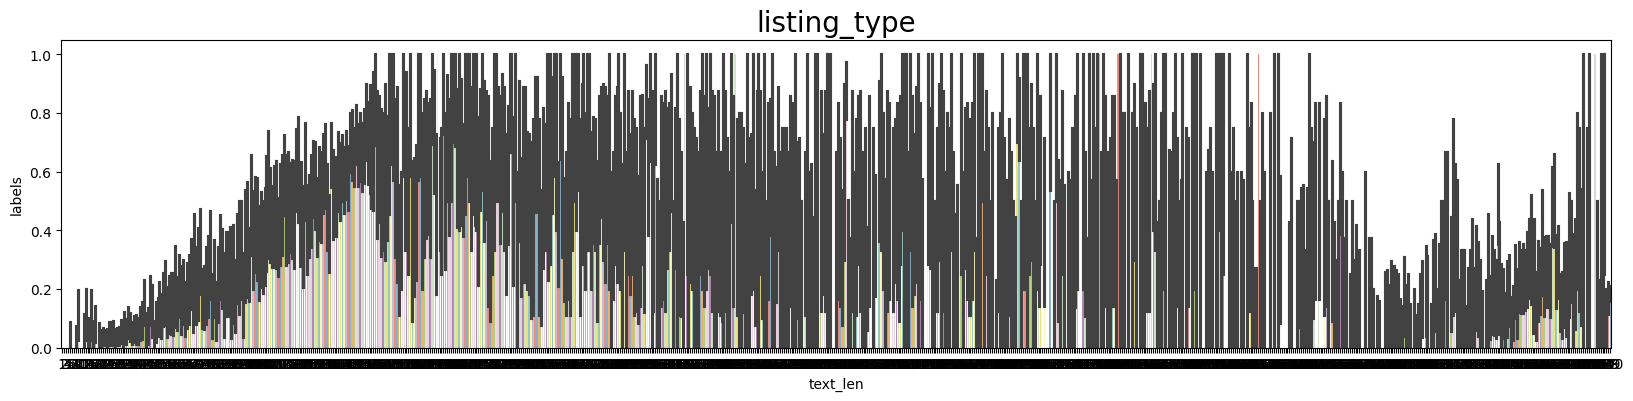

In [41]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='text_len',y='labels',ax=ax,data=train_df,palette='Set3')
plt.title("listing_type",fontsize=20)

Спам сообщения имеют гораздо меньшую длину чем обычные.

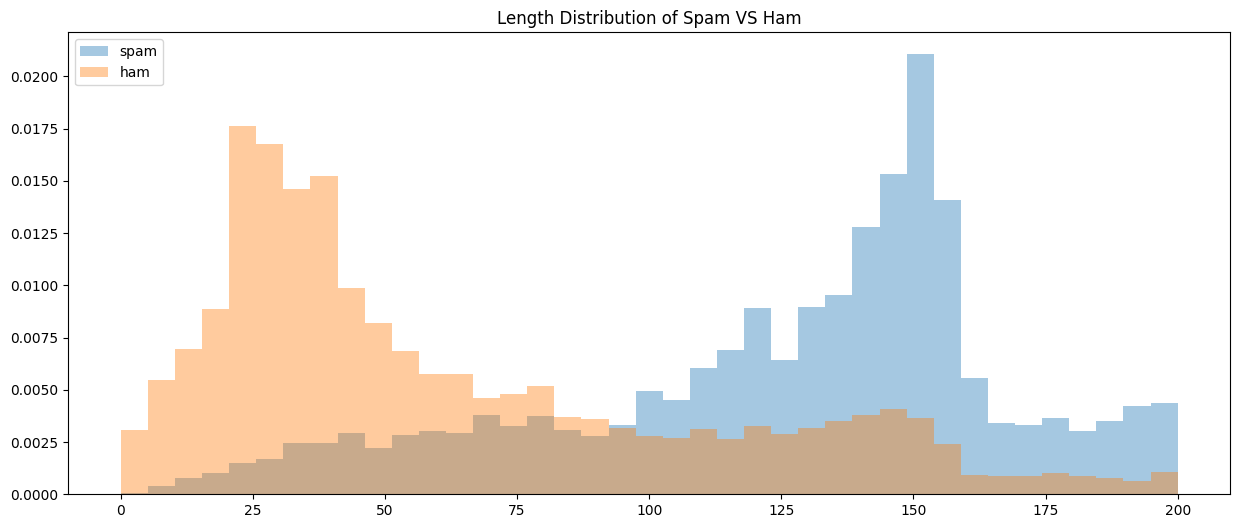

In [42]:
plt.figure(figsize=(15,6))
plt.hist(train_df[train_df['labels']==1]['text_len'],bins = np.linspace(0,200,num=40),alpha=0.4,label='spam',density=True)
plt.hist(train_df[train_df['labels']==0]['text_len'],bins = np.linspace(0,200,num=40),alpha =0.4,label ='ham', density=True)
plt.legend(loc ='upper left')
plt.title('Length Distribution of Spam VS Ham')
plt.show()

Очистка текста от ненужных слов.

In [44]:
def text_process(mess):
    
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    nopunc = [char for char in mess if char not in string.punctuation]

    
    nopunc = ''.join(nopunc)
    
   
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [45]:
train_df['clean_text'] = train_df.text.apply(text_process)
train_df.head()
train_df['clean_text'].fillna("unknown", inplace=True)

In [46]:
words = train_df[train_df.text_type=='ham'].clean_text.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
ham_words.most_common(50)

[('1635465', 11000),
 ('ect', 5343),
 ('enron', 4848),
 ('vince', 4525),
 ('url', 3617),
 ('hou', 2660),
 ('kaminski', 2365),
 ('2000', 2204),
 ('subject', 2110),
 ('j', 1928),
 ('cc', 1909),
 ('please', 1888),
 ('com', 1852),
 ('would', 1849),
 ('pm', 1821),
 ('like', 1423),
 ('thanks', 1406),
 ('time', 1371),
 ('2001', 1347),
 ('know', 1340),
 ('get', 1331),
 ('one', 1127),
 ('group', 1054),
 ('list', 1020),
 ('10', 1017),
 ('new', 1012),
 ('research', 1009),
 ('message', 953),
 ('shirley', 886),
 ('date', 879),
 ('let', 849),
 ('1', 840),
 ('01', 836),
 ('need', 829),
 ('may', 820),
 ('good', 820),
 ('11', 816),
 ('think', 803),
 ('use', 788),
 ('wrote', 784),
 ('also', 773),
 ('meeting', 756),
 ('call', 750),
 ('04', 750),
 ('work', 750),
 ('see', 736),
 ('mail', 686),
 ('could', 685),
 ('00', 680),
 ('12', 679)]

In [48]:
model = Word2Vec(words,min_count=10)

model.wv['get']
model.wv.most_similar("get")

[('try', 0.9752925038337708),
 ('sure', 0.9253779053688049),
 ('tell', 0.9178458452224731),
 ('cant', 0.9119698405265808),
 ('want', 0.9099952578544617),
 ('anything', 0.9097210168838501),
 ('better', 0.908261239528656),
 ('put', 0.9077388048171997),
 ('keep', 0.9065325260162354),
 ('getting', 0.9062265157699585)]

In [49]:
model = Word2Vec(words,min_count=20)

model.wv['go']
model.wv.most_similar("go")

[('ill', 0.9205126166343689),
 ('ltgt', 0.9118397235870361),
 ('leave', 0.9067885875701904),
 ('lor', 0.9043564796447754),
 ('wait', 0.887544572353363),
 ('come', 0.8751499652862549),
 ('pls', 0.8662739396095276),
 ('wan', 0.8614988327026367),
 ('place', 0.8614121079444885),
 ('da', 0.8578809499740601)]

In [50]:
words = train_df[train_df.text_type=='spam'].clean_text.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
spam_words.most_common(50)

[('1635465', 1568),
 ('free', 1059),
 ('get', 858),
 ('1', 656),
 ('click', 555),
 ('new', 550),
 ('call', 523),
 ('link', 506),
 ('one', 484),
 ('com', 479),
 ('money', 469),
 ('please', 464),
 ('5', 452),
 ('business', 425),
 ('best', 425),
 ('time', 421),
 ('account', 414),
 ('want', 411),
 ('3', 406),
 ('company', 405),
 ('make', 399),
 ('hyperlink', 389),
 ('like', 382),
 ('email', 382),
 ('contact', 358),
 ('rs', 352),
 ('join', 343),
 ('message', 340),
 ('life', 338),
 ('mail', 337),
 ('need', 337),
 ('website', 330),
 ('online', 329),
 ('e', 329),
 ('information', 326),
 ('us', 326),
 ('offer', 324),
 ('software', 323),
 ('available', 311),
 ('know', 309),
 ('home', 307),
 ('url', 300),
 ('help', 298),
 ('earn', 297),
 ('investment', 296),
 ('adobe', 292),
 ('today', 284),
 ('http', 284),
 ('first', 280),
 ('good', 275)]

In [51]:
model = Word2Vec(words,min_count=10)

model.wv['call']
model.wv.most_similar("call")

[('fax', 0.9767395257949829),
 ('special', 0.9751208424568176),
 ('ext', 0.9720130562782288),
 ('retail', 0.9704408049583435),
 ('access', 0.97004634141922),
 ('ends', 0.9681546092033386),
 ('improvement', 0.9677344560623169),
 ('10p', 0.9665341973304749),
 ('electronic', 0.9654699563980103),
 ('low', 0.9640841484069824)]

In [52]:
train_df

text_type                                               text  labels  \
0           ham  make sure alex knows his birthday is over in f...       0   
1           ham  a resume for john lavorato thanks vince i will...       0   
2          spam  plzz visit my website moviesgodml to get all m...       1   
3          spam  urgent your mobile number has been awarded wit...       1   
4           ham  overview of hr associates analyst project per ...       0   
...         ...                                                ...     ...   
16273      spam  if you are interested in binary options tradin...       1   
16274      spam  dirty pictureblyk on aircel thanks you for bei...       1   
16275       ham  or you could do this g on mon 1635465 sep 1635...       0   
16276       ham  insta reels par 80 गंद bhara pada hai 👀 kuch b...       0   
16277       ham  alex s paper comments 1 in the sentence betwee...       0   

       text_len                                         clean_text  
0            86  make sure alex knows birthday fifteen minutes ...  
1           520  resume john lavorato thanks vince get moving r...  
2           126  plzz visit website moviesgodml get movies free...  
3           139  urgent mobile number awarded £2000 prize guara...  
4           733  overview hr associates analyst project per dav...  
...         ...                                                ...  
16273       114  interested binary options trading may continue...  
16274       454  dirty pictureblyk aircel thanks valued member ...  
16275       799  could g mon 1635465 sep 1635465 david rees wro...  
16276       102  insta reels par 80 गंद bhara pada hai 👀 kuch b...  
16277       745  alex paper comments 1 sentence eqn 3 eqn think...  

[16278 rows x 5 columns]

In [64]:
import readability

def contains_words(text):
    return any(word.strip(string.punctuation) for word in text.split())


count=0
readability_list = []
final_list = []
txt = train_df['clean_text']
for i in txt:
  if not contains_words(i):
        final_list.append(0)
  else:
    try:
        results = readability.getmeasures(i, lang='en')
        readability_score = results['readability grades']['FleschReadingEase']
        final_list.append(readability_score)
    except:
        final_list.append(0)
train_df['readability_score'] = final_list
train_df.describe()

labels      text_len  readability_score
count  16278.000000  16278.000000       16278.000000
mean       0.295429    310.383524          40.359577
std        0.456250    287.818154          55.981106
min        0.000000      1.000000        -555.580000
25%        0.000000     60.000000          -5.169420
50%        0.000000    157.000000          41.025000
75%        1.000000    639.000000          80.306364
max        1.000000    800.000000         205.820000

In [65]:
X = train_df['clean_text']
y = train_df['labels']

In [67]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X)

X_vec = vect.transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.1, random_state = 0)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier

model_gb = Pipeline([('tfidf', TfidfTransformer()),
                    ('model', GradientBoostingClassifier(random_state=100, n_estimators=150,min_samples_split=100, max_depth=6)),
                    ])

model_gb.fit(X_train,y_train)

ytest = np.array(y_test)
y_pred = model_gb.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(ytest, y_pred))

accuracy 0.9047911547911548
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1172
           1       0.92      0.72      0.81       456

    accuracy                           0.90      1628
   macro avg       0.91      0.85      0.87      1628
weighted avg       0.91      0.90      0.90      1628



In [73]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',RandomForestClassifier(n_estimators=50)),
                   ])

model_rf.fit(X_train,y_train)

ytest = np.array(y_test)
preds = model_rf.predict(X_test)

In [74]:
print('accuracy %s' % accuracy_score(preds, y_test))
print(classification_report(ytest, preds))

accuracy 0.9336609336609336
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1172
           1       0.93      0.82      0.87       456

    accuracy                           0.93      1628
   macro avg       0.93      0.90      0.91      1628
weighted avg       0.93      0.93      0.93      1628



In [75]:
from sklearn.svm import LinearSVC, SVC

model_svc = Pipeline([('tfidf', TfidfTransformer()),
                     ('model',LinearSVC()),
                     ])

model_svc.fit(X_train,y_train)

ytest = np.array(y_test)
predict = model_svc.predict(X_test)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [76]:
print('accuracy %s' % accuracy_score(predict, y_test))
print(classification_report(ytest, predict))

accuracy 0.957002457002457
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1172
           1       0.93      0.91      0.92       456

    accuracy                           0.96      1628
   macro avg       0.95      0.94      0.95      1628
weighted avg       0.96      0.96      0.96      1628



Лучшей моделью оказался SVMЮ

In [77]:
test_df

text
0     j jim whitehead ejw cse ucsc edu writes j you ...
1     original message from bitbitch magnesium net p...
2     java for managers vince durasoft who just taug...
3                  there is a youtuber name saiman says
4     underpriced issue with high return on equity t...
...                                                 ...
4065  husband to wifetum meri zindagi hoorwifeor kya...
4066  baylor enron case study cindy yes i shall co a...
4067                           boring as compared to tp
4068  hellogorgeous hows u my fone was on charge lst...
4069  energy conference mark we are really swamped a...

[4070 rows x 1 columns]

In [78]:
test_df['clean_text'] = test_df.text.apply(text_process)
test_df.head()
test_df['clean_text'].fillna("unknown", inplace=True)

In [79]:
test_df

text  \
0     j jim whitehead ejw cse ucsc edu writes j you ...   
1     original message from bitbitch magnesium net p...   
2     java for managers vince durasoft who just taug...   
3                  there is a youtuber name saiman says   
4     underpriced issue with high return on equity t...   
...                                                 ...   
4065  husband to wifetum meri zindagi hoorwifeor kya...   
4066  baylor enron case study cindy yes i shall co a...   
4067                           boring as compared to tp   
4068  hellogorgeous hows u my fone was on charge lst...   
4069  energy conference mark we are really swamped a...   

                                             clean_text  
0     j jim whitehead ejw cse ucsc edu writes j open...  
1     original message bitbitch magnesium net people...  
2     java managers vince durasoft taught java class...  
3                             youtuber name saiman says  
4     underpriced issue high return equity oil gas a...  
...                                                 ...  
4065  husband wifetum meri zindagi hoorwifeor kyatel...  
4066  baylor enron case study cindy yes shall co aut...  
4067                                 boring compared tp  
4068  hellogorgeous hows fone charge lst nitw wen te...  
4069  energy conference mark really swamped would li...  

[4070 rows x 2 columns]

In [80]:
test = test_df['clean_text']

vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X)

test_vec = vect.transform(test)

In [81]:
test_predict = model_svc.predict(test_vec)
test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
test_df['labels'] = test_predict

In [83]:
test_df

text  \
0     j jim whitehead ejw cse ucsc edu writes j you ...   
1     original message from bitbitch magnesium net p...   
2     java for managers vince durasoft who just taug...   
3                  there is a youtuber name saiman says   
4     underpriced issue with high return on equity t...   
...                                                 ...   
4065  husband to wifetum meri zindagi hoorwifeor kya...   
4066  baylor enron case study cindy yes i shall co a...   
4067                           boring as compared to tp   
4068  hellogorgeous hows u my fone was on charge lst...   
4069  energy conference mark we are really swamped a...   

                                             clean_text  labels  
0     j jim whitehead ejw cse ucsc edu writes j open...       0  
1     original message bitbitch magnesium net people...       0  
2     java managers vince durasoft taught java class...       0  
3                             youtuber name saiman says       0  
4     underpriced issue high return equity oil gas a...       1  
...                                                 ...     ...  
4065  husband wifetum meri zindagi hoorwifeor kyatel...       0  
4066  baylor enron case study cindy yes shall co aut...       0  
4067                                 boring compared tp       0  
4068  hellogorgeous hows fone charge lst nitw wen te...       0  
4069  energy conference mark really swamped would li...       0  

[4070 rows x 3 columns]

В тестовом датасете 2906 не спам и 1164 спам сообщений.

In [86]:
test_df.groupby('labels').describe().T

labels                                                             0  \
text       count                                                2906   
           unique                                               2906   
           top     j jim whitehead ejw cse ucsc edu writes j you ...   
           freq                                                    1   
clean_text count                                                2906   
           unique                                               2894   
           top                                                         
           freq                                                    9   

labels                                                             1  
text       count                                                1164  
           unique                                               1164  
           top     underpriced issue with high return on equity t...  
           freq                                                    1  
clean_text count                                                1164  
           unique                                               1162  
           top     tried contact reply offer video handset 750 an...  
           freq                                                    2

In [88]:
test_df['text_type'] = test_df.labels.map({0:'ham', 1:'spam'})

In [89]:
test_df

text  \
0     j jim whitehead ejw cse ucsc edu writes j you ...   
1     original message from bitbitch magnesium net p...   
2     java for managers vince durasoft who just taug...   
3                  there is a youtuber name saiman says   
4     underpriced issue with high return on equity t...   
...                                                 ...   
4065  husband to wifetum meri zindagi hoorwifeor kya...   
4066  baylor enron case study cindy yes i shall co a...   
4067                           boring as compared to tp   
4068  hellogorgeous hows u my fone was on charge lst...   
4069  energy conference mark we are really swamped a...   

                                             clean_text  labels text_type  
0     j jim whitehead ejw cse ucsc edu writes j open...       0       ham  
1     original message bitbitch magnesium net people...       0       ham  
2     java managers vince durasoft taught java class...       0       ham  
3                             youtuber name saiman says       0       ham  
4     underpriced issue high return equity oil gas a...       1      spam  
...                                                 ...     ...       ...  
4065  husband wifetum meri zindagi hoorwifeor kyatel...       0       ham  
4066  baylor enron case study cindy yes shall co aut...       0       ham  
4067                                 boring compared tp       0       ham  
4068  hellogorgeous hows fone charge lst nitw wen te...       0       ham  
4069  energy conference mark really swamped would li...       0       ham  

[4070 rows x 4 columns]

In [93]:
test_df.drop(['clean_text','labels'], axis=1, inplace=True)

In [94]:
test_df

text text_type
0     j jim whitehead ejw cse ucsc edu writes j you ...       ham
1     original message from bitbitch magnesium net p...       ham
2     java for managers vince durasoft who just taug...       ham
3                  there is a youtuber name saiman says       ham
4     underpriced issue with high return on equity t...      spam
...                                                 ...       ...
4065  husband to wifetum meri zindagi hoorwifeor kya...       ham
4066  baylor enron case study cindy yes i shall co a...       ham
4067                           boring as compared to tp       ham
4068  hellogorgeous hows u my fone was on charge lst...       ham
4069  energy conference mark we are really swamped a...       ham

[4070 rows x 2 columns]

In [95]:
test_df.to_csv('test_spam_with_labels.csv', index=False)